In [1]:
# Import Modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st


In [2]:
# Read in clean data
filename = "data_clean_351.csv"
df = pd.read_csv(filename)

print(df.shape)
df.info()

(351, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               351 non-null    object 
 1   hs_gpa               351 non-null    float64
 2   year_of_study        351 non-null    int64  
 3   field                351 non-null    object 
 4   current_gpa          351 non-null    float64
 5   off_campus           351 non-null    object 
 6   monthly_allowance    351 non-null    object 
 7   scholarship          351 non-null    object 
 8   study_hours          351 non-null    object 
 9   partying_frequency   351 non-null    object 
 10  drinks_consumed      351 non-null    object 
 11  classes_missed       351 non-null    object 
 12  modules_failed       351 non-null    object 
 13  relationship         351 non-null    object 
 14  parents_approval     351 non-null    object 
 15  parent_relationship  351 non-n

In [3]:
df.head(10)

,gender,hs_gpa,year_of_study,field,current_gpa,off_campus,monthly_allowance,scholarship,study_hours,partying_frequency,drinks_consumed,classes_missed,modules_failed,relationship,parents_approval,parent_relationship
0,Female,76.0,2,Arts & Social Sciences,72.0,Yes,R 4001- R 5000,No,8+,Only weekends,8+,3,0,Yes,Yes,Very close
1,Male,89.0,2,Economic & Management Sciences,75.0,Yes,R 7001 - R 8000,Yes,8+,Only weekends,3-5,4+,0,No,Yes,Very close
2,Male,76.0,1,AgriSciences,55.0,Yes,R 4001- R 5000,No,3-5,2,8+,3,0,No,Yes,Very close
3,Male,89.0,2,Engineering,84.0,Yes,R 6001 - R 7000,No,3-5,3,8+,2,0,Yes,Yes,Very close
4,Female,74.0,2,Arts & Social Sciences,52.0,Yes,R 4001- R 5000,No,3-5,Only weekends,5-8,1,3,No,Yes,Fair
5,Male,83.0,0,Engineering,0.0,Yes,R 6001 - R 7000,No,8+,4+,3-5,3,1,Yes,Yes,Very close
6,Male,80.0,2,Economic & Management Sciences,54.0,Yes,R 5001 - R 6000,No,8+,2,5-8,1,0,No,Yes,Very close
7,Female,85.0,2,Arts & Social Sciences,75.0,Yes,R 5001 - R 6000,No,3-5,3,3-5,2,0,Yes,Yes,Very close
8,Female,80.0,2,Arts & Social Sciences,75.0,Yes,R 6001 - R 7000,No,8+,3,8+,0,0,No,Yes,Close
9,Male,79.0,2,Economic & Management Sciences,64.0,Yes,R 5001 - R 6000,No,3-5,2,3-5,2,4+,No,Yes,Very close


In [4]:
# Research Question aims to look at at the impact of scholarship status and residence on classes missed for individuals drinking at similar rates
# Gain a basis of what data for these columns looks like

In [5]:
df.scholarship.value_counts()

scholarship
No     315
Yes     36
Name: count, dtype: int64

In [6]:
# Check to see how much overlap there is between those on scholarship and those living on campus
df.loc[(df.scholarship == "Yes") & (df.off_campus == "No")]

,gender,hs_gpa,year_of_study,field,current_gpa,off_campus,monthly_allowance,scholarship,study_hours,partying_frequency,drinks_consumed,classes_missed,modules_failed,relationship,parents_approval,parent_relationship
73,Female,85.0,3,Science,84.0,No,R 5001 - R 6000,Yes,8+,2,5-8,0,0,Yes,Yes,Very close
136,Female,90.0,1,Economic & Management Sciences,75.0,No,R 4001- R 5000,Yes,3-5,Only weekends,1-3,0,1,No,Yes,Close
191,Male,87.0,3,Economic & Management Sciences,74.0,No,R 4001- R 5000,Yes,8+,2,8+,3,0,No,Yes,Very close
193,Male,80.0,2,Engineering,65.0,No,R 4001- R 5000,Yes,3-5,1,1-3,1,4+,Yes,No,Fair
209,Male,82.0,3,Economic & Management Sciences,77.0,No,R 5001 - R 6000,Yes,8+,0,0,0,0,No,Yes,Close
293,Male,74.0,2,Economic & Management Sciences,56.0,No,R 4001- R 5000,Yes,8+,1,1-3,1,0,Yes,No,Fair
295,Male,80.0,2,Law,60.0,No,R 4001- R 5000,Yes,1-3,1,5-8,0,3,Yes,Yes,Fair


In [7]:
df.classes_missed.value_counts()

classes_missed
0     177
1      71
2      55
4+     25
3      23
Name: count, dtype: int64

In [8]:
df.modules_failed.value_counts()

modules_failed
0     224
1      53
2      28
3      23
4+     23
Name: count, dtype: int64

In [9]:
df.partying_frequency.value_counts()

partying_frequency
1                95
Only weekends    93
2                80
3                54
4+               16
0                13
Name: count, dtype: int64

In [10]:
df_schol = df.loc[df.scholarship == "Yes"]
df_schol.head()

,gender,hs_gpa,year_of_study,field,current_gpa,off_campus,monthly_allowance,scholarship,study_hours,partying_frequency,drinks_consumed,classes_missed,modules_failed,relationship,parents_approval,parent_relationship
1,Male,89.0,2,Economic & Management Sciences,75.0,Yes,R 7001 - R 8000,Yes,8+,Only weekends,3-5,4+,0,No,Yes,Very close
15,Male,80.0,2,Engineering,62.0,Yes,R 4001- R 5000,Yes,8+,Only weekends,5-8,0,2,No,Yes,Very close
47,Male,98.0,1,Engineering,89.0,Yes,R 4001- R 5000,Yes,1-3,Only weekends,8+,0,4+,Yes,No,Distant
50,Male,85.0,2,Economic & Management Sciences,66.0,Yes,R 4001- R 5000,Yes,8+,1,8+,4+,0,Yes,Yes,Fair
57,Female,81.0,2,Other,65.0,Yes,R 5001 - R 6000,Yes,8+,Only weekends,3-5,1,1,No,Yes,Very close


In [11]:
df_no_schol = df.loc[df.scholarship == "No"]
df_no_schol.head()

,gender,hs_gpa,year_of_study,field,current_gpa,off_campus,monthly_allowance,scholarship,study_hours,partying_frequency,drinks_consumed,classes_missed,modules_failed,relationship,parents_approval,parent_relationship
0,Female,76.0,2,Arts & Social Sciences,72.0,Yes,R 4001- R 5000,No,8+,Only weekends,8+,3,0,Yes,Yes,Very close
2,Male,76.0,1,AgriSciences,55.0,Yes,R 4001- R 5000,No,3-5,2,8+,3,0,No,Yes,Very close
3,Male,89.0,2,Engineering,84.0,Yes,R 6001 - R 7000,No,3-5,3,8+,2,0,Yes,Yes,Very close
4,Female,74.0,2,Arts & Social Sciences,52.0,Yes,R 4001- R 5000,No,3-5,Only weekends,5-8,1,3,No,Yes,Fair
5,Male,83.0,0,Engineering,0.0,Yes,R 6001 - R 7000,No,8+,4+,3-5,3,1,Yes,Yes,Very close


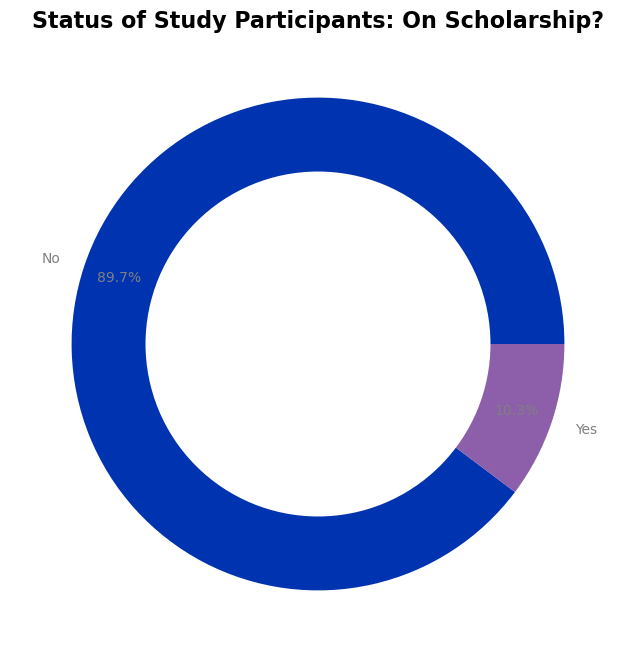

In [72]:
# Create a donut chart for the breakdown of scholarship vs no scholarship
plt.figure(figsize =(8,8))

schol_counts = df.scholarship.value_counts()
pielabels = list(schol_counts.index)
piedata= list(schol_counts.values)

plt.pie(piedata, colors = ["#0033b0","#8d5eaa"],labels=pielabels,autopct="%1.1f%%", pctdistance=0.85,textprops=dict(color="gray"))

center_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
 
fig.gca().add_artist(center_circle)


plt.title("Status of Study Participants: On Scholarship?", fontweight = "bold", fontsize = 16)


plt.show()

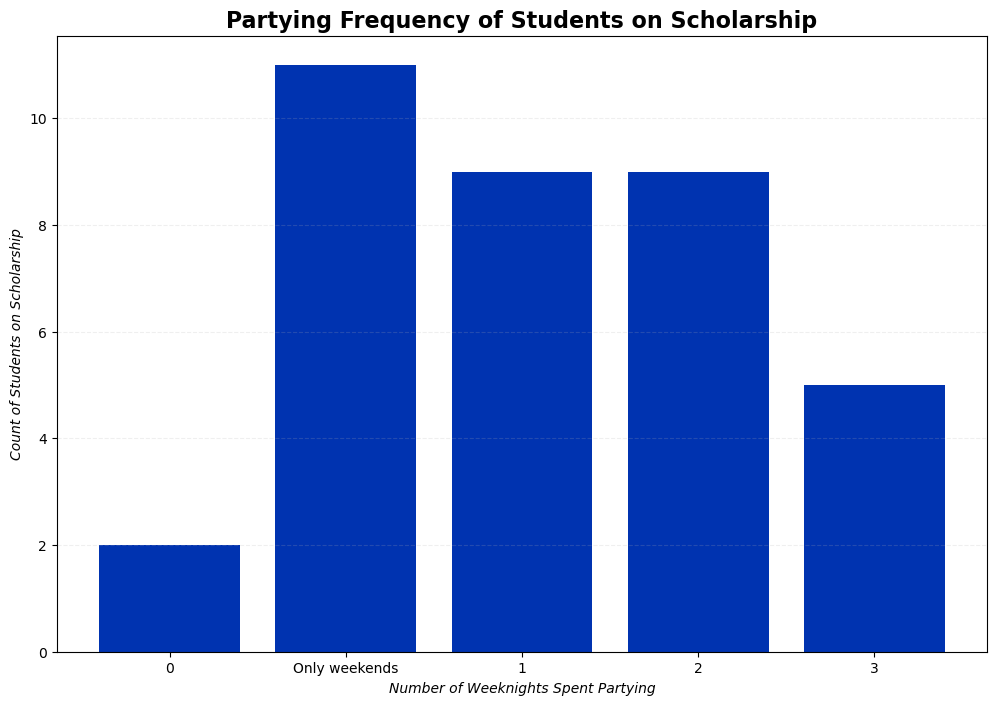

In [44]:
# Generate a bar plot showing the number of weeknights spent partying per week by students on scholarship
plt.figure(figsize =(12,8))

schol_party = df_schol["partying_frequency"].value_counts()
x = list(schol_party.index)
y = list(schol_party.values)

# Reorder the values so they present logically
reorder = [4, 0, 1, 2, 3]

x_reordered = [x[i] for i in reorder]
y_reordered = [y[i] for i in reorder]

plt.grid(axis='y', alpha = .2)
plt.bar(x_reordered,y_reordered, color = "#0033b0")

plt.xlabel("Number of Weeknights Spent Partying", fontstyle = "italic")
plt.ylabel("Count of Students on Scholarship", fontstyle = "italic")
plt.title("Partying Frequency of Students on Scholarship", fontweight = "bold", fontsize = 16)


plt.grid(axis='y', alpha = .2, linestyle = '--')


plt.show()

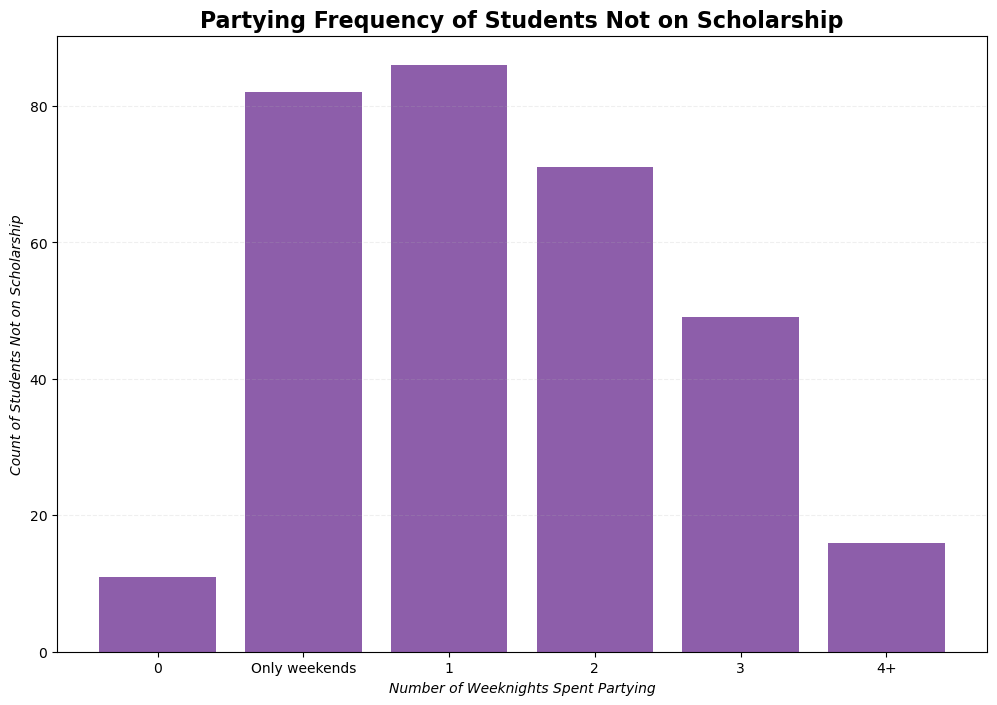

In [45]:
# Generate a bar plot showing the number of weeknights spent partying per week by students not on scholarship
plt.figure(figsize =(12,8))

no_schol_party = df_no_schol["partying_frequency"].value_counts()
x = list(no_schol_party.index)
y = list(no_schol_party.values)

# Reorder the values so they present logically
reorder = [5, 1, 0, 2, 3, 4]

x_reordered = [x[i] for i in reorder]
y_reordered = [y[i] for i in reorder]

plt.bar(x_reordered,y_reordered, color = "#8d5eaa")

plt.xlabel("Number of Weeknights Spent Partying", fontstyle = "italic")
plt.ylabel("Count of Students Not on Scholarship", fontstyle = "italic")
plt.title("Partying Frequency of Students Not on Scholarship", fontweight = "bold", fontsize = 16)

plt.grid(axis='y', alpha = .2, linestyle = '--')

plt.show()

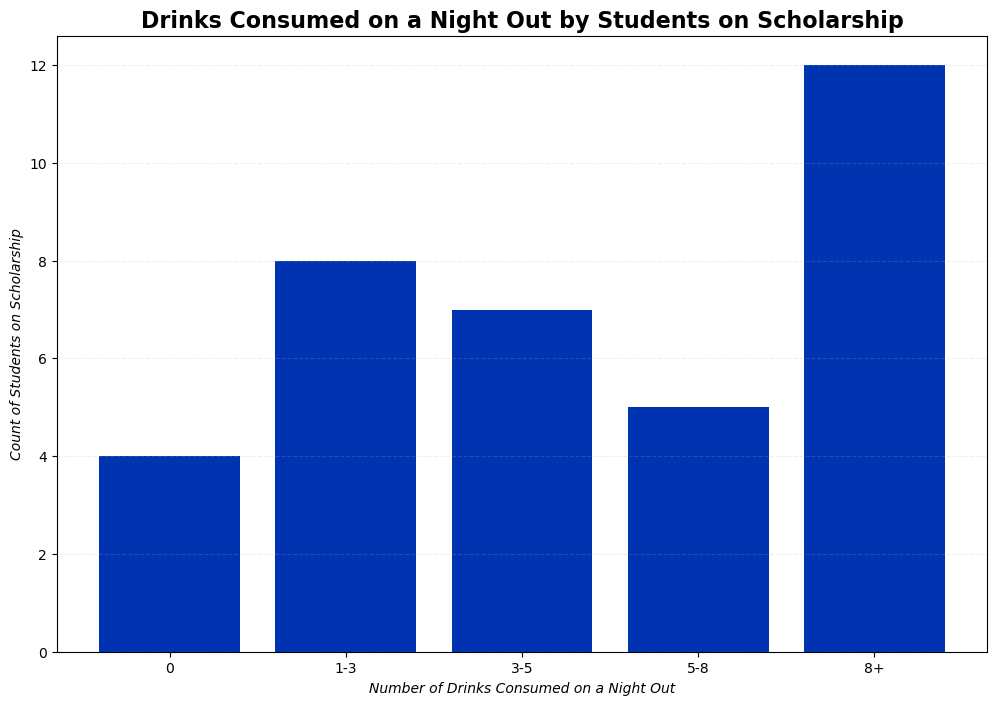

In [46]:
# Generate a bar plot showing the average alcohol volume on nights out by students on scholarship
plt.figure(figsize =(12,8))

schol_drinks = df_schol["drinks_consumed"].value_counts()
x = list(schol_drinks.index)
y = list(schol_drinks.values)

# Reorder the values so they present logically
reorder = [4,1,2,3,0]

x_reordered = [x[i] for i in reorder]
y_reordered = [y[i] for i in reorder]


plt.bar(x_reordered,y_reordered, color = "#0033b0")

plt.xlabel("Number of Drinks Consumed on a Night Out", fontstyle = "italic")
plt.ylabel("Count of Students on Scholarship", fontstyle = "italic")
plt.title("Drinks Consumed on a Night Out by Students on Scholarship", fontweight = "bold", fontsize = 16)

plt.grid(axis='y', alpha = .2, linestyle = '--')

plt.show()

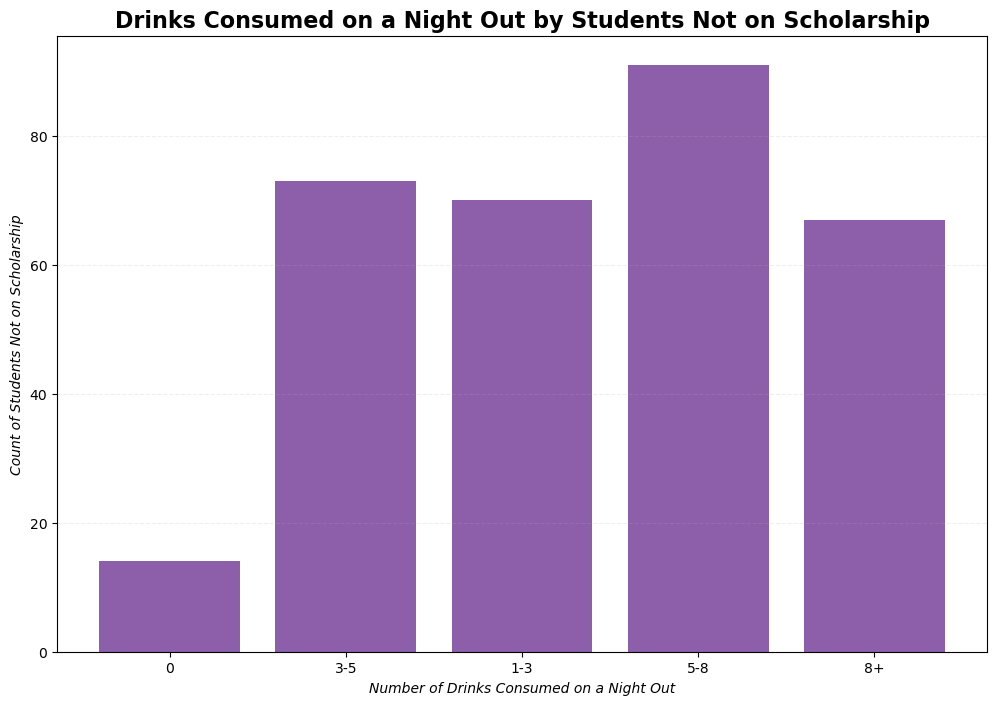

In [47]:
# Generate a bar plot showing the average alcohol volume on nights out by students on scholarship
plt.figure(figsize =(12,8))

no_schol_drinks = df_no_schol["drinks_consumed"].value_counts()
x = list(no_schol_drinks.index)
y = list(no_schol_drinks.values)

# Reorder the values so they present logically
reorder = [4,1,2,0,3]

x_reordered = [x[i] for i in reorder]
y_reordered = [y[i] for i in reorder]


plt.bar(x_reordered,y_reordered, color = "#8d5eaa")

plt.xlabel("Number of Drinks Consumed on a Night Out", fontstyle = "italic")
plt.ylabel("Count of Students Not on Scholarship", fontstyle = "italic")
plt.title("Drinks Consumed on a Night Out by Students Not on Scholarship", fontweight = "bold", fontsize = 16)

plt.grid(axis='y', alpha = .2, linestyle = '--')

plt.show()

In [17]:
# Creation of a sub-dataframe for students living on campus
df_on_campus = df.loc[df.off_campus == "No"]
df_on_campus.head()

,gender,hs_gpa,year_of_study,field,current_gpa,off_campus,monthly_allowance,scholarship,study_hours,partying_frequency,drinks_consumed,classes_missed,modules_failed,relationship,parents_approval,parent_relationship
14,Male,79.0,2,Economic & Management Sciences,54.0,No,R 5001 - R 6000,No,5-8,2,0,0,1,No,Yes,Fair
21,Female,83.0,2,Economic & Management Sciences,55.0,No,R 5001 - R 6000,No,8+,Only weekends,1-3,0,1,No,Yes,Very close
45,Female,70.0,1,Economic & Management Sciences,0.0,No,R 4001- R 5000,No,3-5,2,3-5,2,0,Yes,No,Very close
46,Male,84.0,1,Science,74.0,No,R 4001- R 5000,No,1-3,1,1-3,0,0,No,Yes,Close
49,Female,84.0,1,Medicine and Health Services,80.0,No,R 6001 - R 7000,No,8+,Only weekends,5-8,2,0,No,Yes,Very close


In [18]:
df_off_campus = df.loc[df.off_campus == "Yes"]
df_off_campus.head()

,gender,hs_gpa,year_of_study,field,current_gpa,off_campus,monthly_allowance,scholarship,study_hours,partying_frequency,drinks_consumed,classes_missed,modules_failed,relationship,parents_approval,parent_relationship
0,Female,76.0,2,Arts & Social Sciences,72.0,Yes,R 4001- R 5000,No,8+,Only weekends,8+,3,0,Yes,Yes,Very close
1,Male,89.0,2,Economic & Management Sciences,75.0,Yes,R 7001 - R 8000,Yes,8+,Only weekends,3-5,4+,0,No,Yes,Very close
2,Male,76.0,1,AgriSciences,55.0,Yes,R 4001- R 5000,No,3-5,2,8+,3,0,No,Yes,Very close
3,Male,89.0,2,Engineering,84.0,Yes,R 6001 - R 7000,No,3-5,3,8+,2,0,Yes,Yes,Very close
4,Female,74.0,2,Arts & Social Sciences,52.0,Yes,R 4001- R 5000,No,3-5,Only weekends,5-8,1,3,No,Yes,Fair


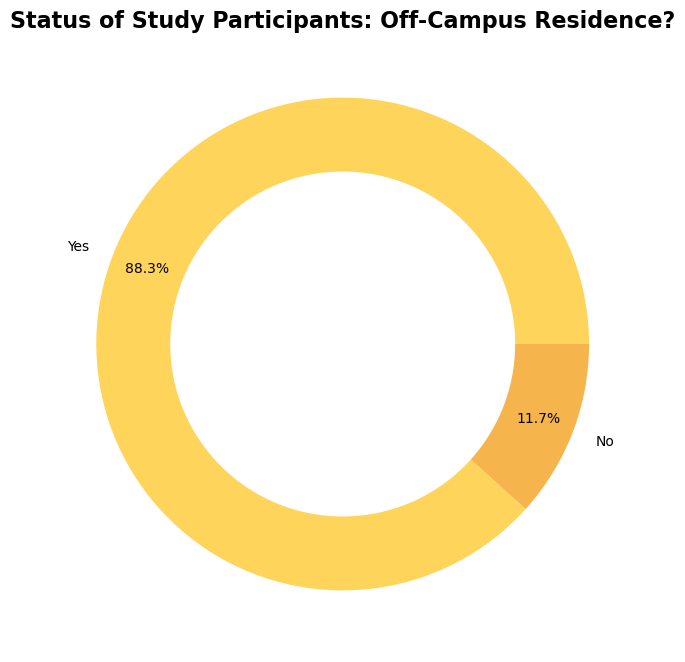

In [52]:
# Create a donut chart for the breakdown of on campus vs off campus
plt.figure(figsize =(8,8))

res_counts = df.off_campus.value_counts()
pielabels = list(res_counts.index)
piedata= list(res_counts.values)

plt.pie(piedata, colors = ["#ffd45b","#f6b44d"],labels=pielabels,autopct="%1.1f%%", pctdistance=0.85)

center_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
 
fig.gca().add_artist(center_circle)


plt.title("Status of Study Participants: Off-Campus Residence?", fontweight = "bold", fontsize = 16)


plt.show()

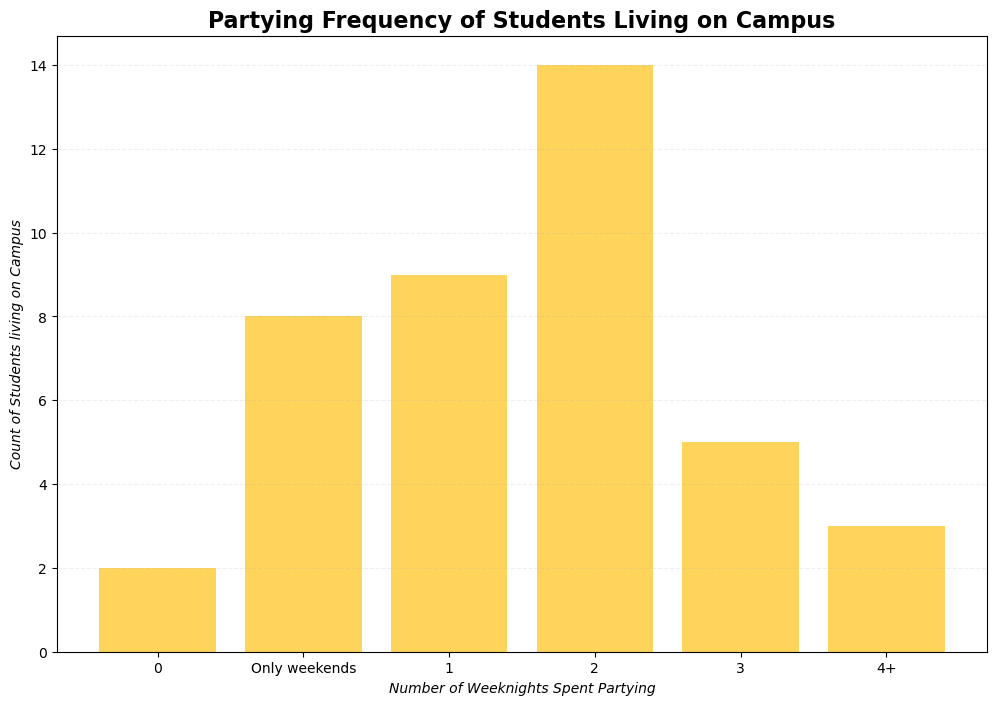

In [62]:
# Generate a bar plot showing the number of weeknights spent partying per week by students on campus
plt.figure(figsize =(12,8))

on_campus_party = df_on_campus["partying_frequency"].value_counts()
x = list(on_campus_party.index)
y = list(on_campus_party.values)

# Reorder the values so they present logically
reorder = [5,2,1,0,3,4]

x_reordered = [x[i] for i in reorder]
y_reordered = [y[i] for i in reorder]

plt.bar(x_reordered,y_reordered, color = "#ffd45b")

plt.xlabel("Number of Weeknights Spent Partying", fontstyle = "italic")
plt.ylabel("Count of Students living on Campus", fontstyle = "italic")
plt.title("Partying Frequency of Students Living on Campus", fontweight = "bold", fontsize = 16)

plt.grid(axis='y', alpha = .2, linestyle = '--')

plt.show()

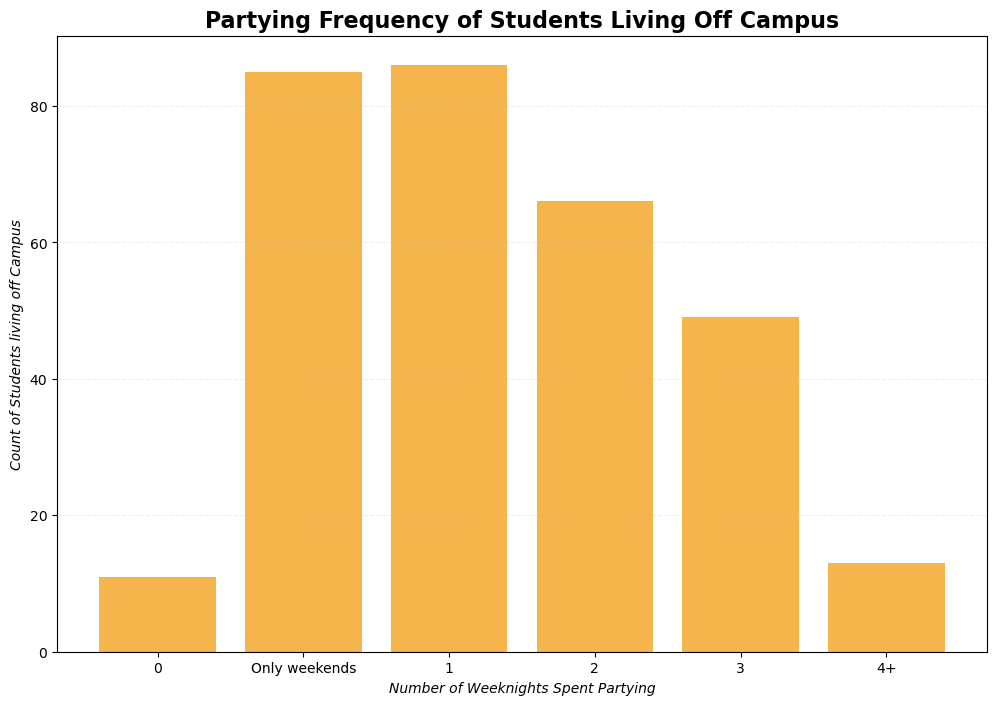

In [66]:
# Generate a bar plot showing the number of weeknights spent partying per week by students off campus
plt.figure(figsize =(12,8))

off_campus_party = df_off_campus["partying_frequency"].value_counts()
x = list(off_campus_party.index)
y = list(off_campus_party.values)

# Reorder the values so they present logically
reorder = [5,1,0,2,3,4]

x_reordered = [x[i] for i in reorder]
y_reordered = [y[i] for i in reorder]

plt.bar(x_reordered,y_reordered, color = "#f6b44d")

plt.xlabel("Number of Weeknights Spent Partying", fontstyle = "italic")
plt.ylabel("Count of Students living off Campus", fontstyle = "italic")
plt.title("Partying Frequency of Students Living Off Campus", fontweight = "bold", fontsize = 16)

plt.grid(axis='y', alpha = .2, linestyle = '--')

plt.show()

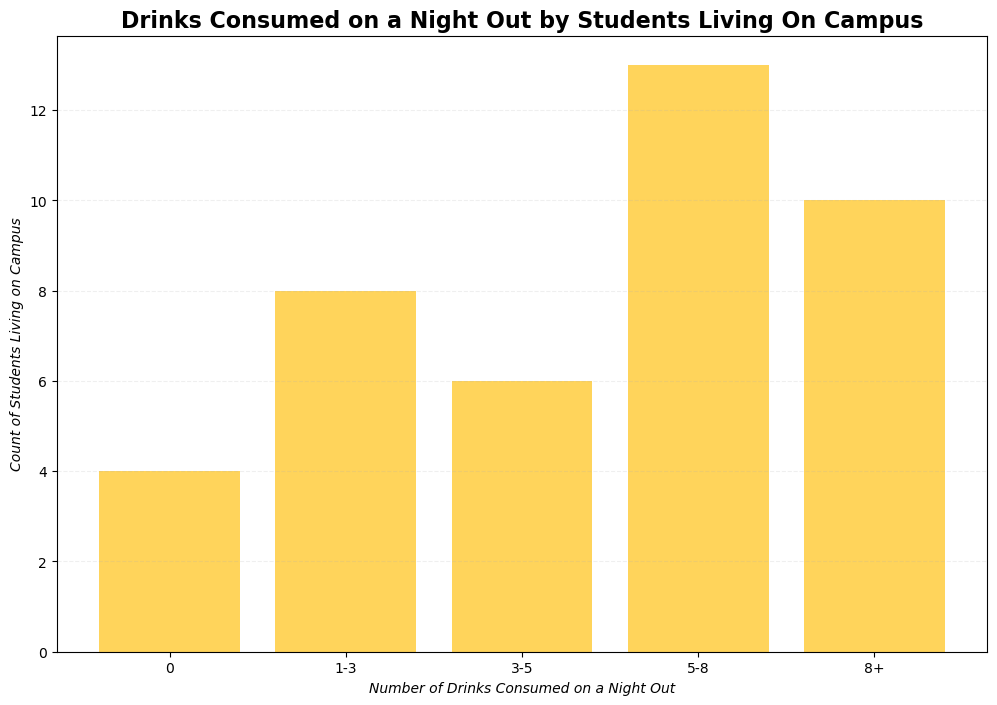

In [64]:
# Generate a bar plot showing the average alcohol volume on nights out by students on campus
plt.figure(figsize =(12,8))

on_campus_drinks = df_on_campus["drinks_consumed"].value_counts()
x = list(on_campus_drinks.index)
y = list(on_campus_drinks.values)

# Reorder the values so they present logically
reorder = [4,2,3,0,1]

x_reordered = [x[i] for i in reorder]
y_reordered = [y[i] for i in reorder]


plt.bar(x_reordered,y_reordered, color = "#ffd45b")

plt.xlabel("Number of Drinks Consumed on a Night Out", fontstyle = "italic")
plt.ylabel("Count of Students Living on Campus", fontstyle = "italic")
plt.title("Drinks Consumed on a Night Out by Students Living On Campus", fontweight = "bold", fontsize = 16)

plt.grid(axis='y', alpha = .2, linestyle = '--')

plt.show()

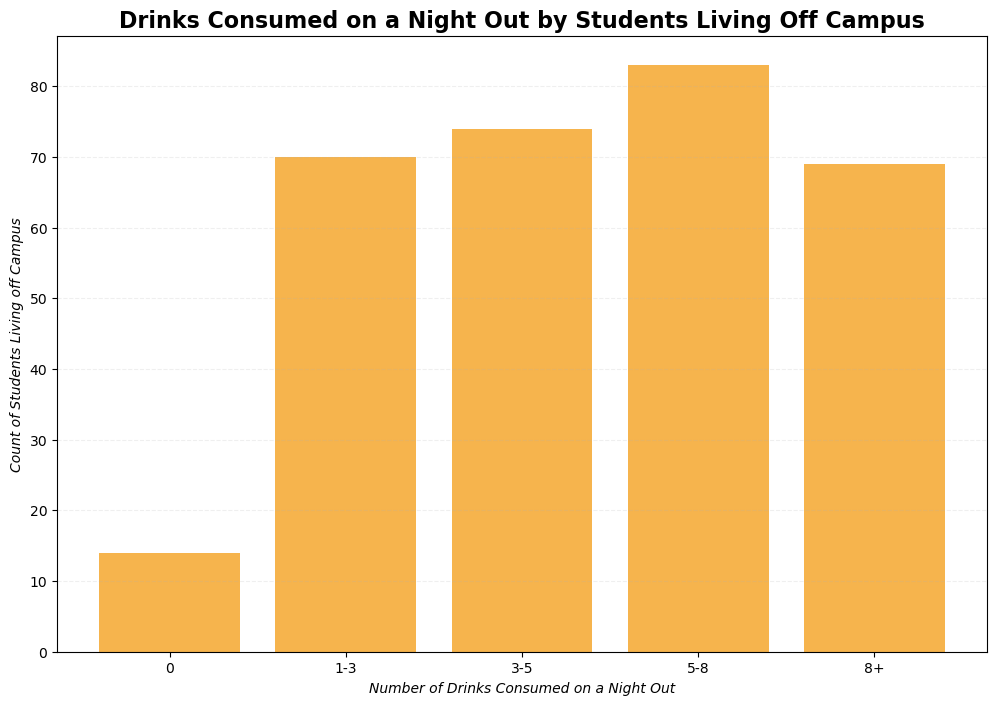

In [67]:
# Generate a bar plot showing the average alcohol volume on nights out by students off campus
plt.figure(figsize =(12,8))

off_campus_drinks = df_off_campus["drinks_consumed"].value_counts()
x = list(off_campus_drinks.index)
y = list(off_campus_drinks.values)

# Reorder the values so they present logically
reorder = [4,2,1,0,3]

x_reordered = [x[i] for i in reorder]
y_reordered = [y[i] for i in reorder]


plt.bar(x_reordered,y_reordered, color = "#f6b44d")

plt.xlabel("Number of Drinks Consumed on a Night Out", fontstyle = "italic")
plt.ylabel("Count of Students Living off Campus", fontstyle = "italic")
plt.title("Drinks Consumed on a Night Out by Students Living Off Campus", fontweight = "bold", fontsize = 16)

plt.grid(axis='y', alpha = .2, linestyle = '--')

plt.show()

In [24]:
# Drop zero GPAs
df_drop_zeros = df.loc[df.current_gpa != 0]
df_drop_zeros.info()

<class 'pandas.core.frame.DataFrame'>
Index: 298 entries, 0 to 350
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               298 non-null    object 
 1   hs_gpa               298 non-null    float64
 2   year_of_study        298 non-null    int64  
 3   field                298 non-null    object 
 4   current_gpa          298 non-null    float64
 5   off_campus           298 non-null    object 
 6   monthly_allowance    298 non-null    object 
 7   scholarship          298 non-null    object 
 8   study_hours          298 non-null    object 
 9   partying_frequency   298 non-null    object 
 10  drinks_consumed      298 non-null    object 
 11  classes_missed       298 non-null    object 
 12  modules_failed       298 non-null    object 
 13  relationship         298 non-null    object 
 14  parents_approval     298 non-null    object 
 15  parent_relationship  298 non-null    object 


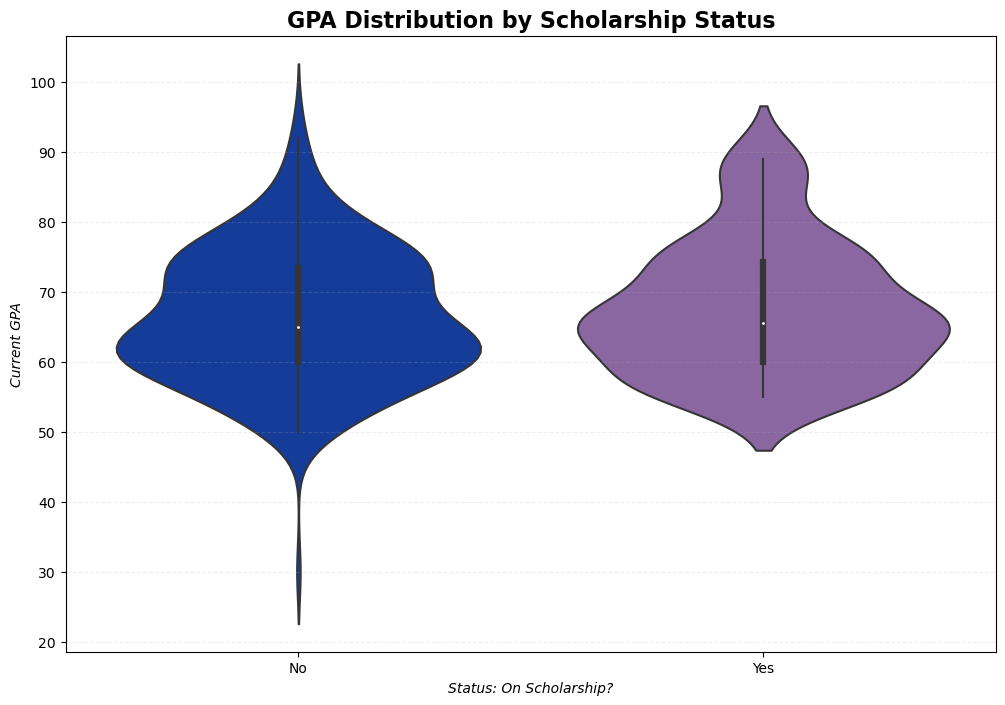

In [68]:
# Compare the GPAs for students on scholarship vs not on scholarship
plt.figure(figsize =(12,8))
sns.violinplot(
    data=df_drop_zeros,x="scholarship", y="current_gpa",bw = .4, palette = ["#0033b0","#8d5eaa"]
)

plt.xlabel("Status: On Scholarship?", fontstyle = "italic")
plt.ylabel("Current GPA", fontstyle = "italic")
plt.title("GPA Distribution by Scholarship Status", fontweight = "bold", fontsize = 16)

plt.grid(axis='y', alpha = .2, linestyle = '--')

plt.show()

In [26]:
df_drop_zeros.groupby("scholarship").describe().current_gpa

,count,mean,std,min,25%,50%,75%,max
scholarship,,,,,,,,
No,270.0,66.377778,9.315735,30.0,60.0,65.0,73.375,95.2
Yes,28.0,67.607143,9.542650,55.0,60.0,65.5,74.250,89.0


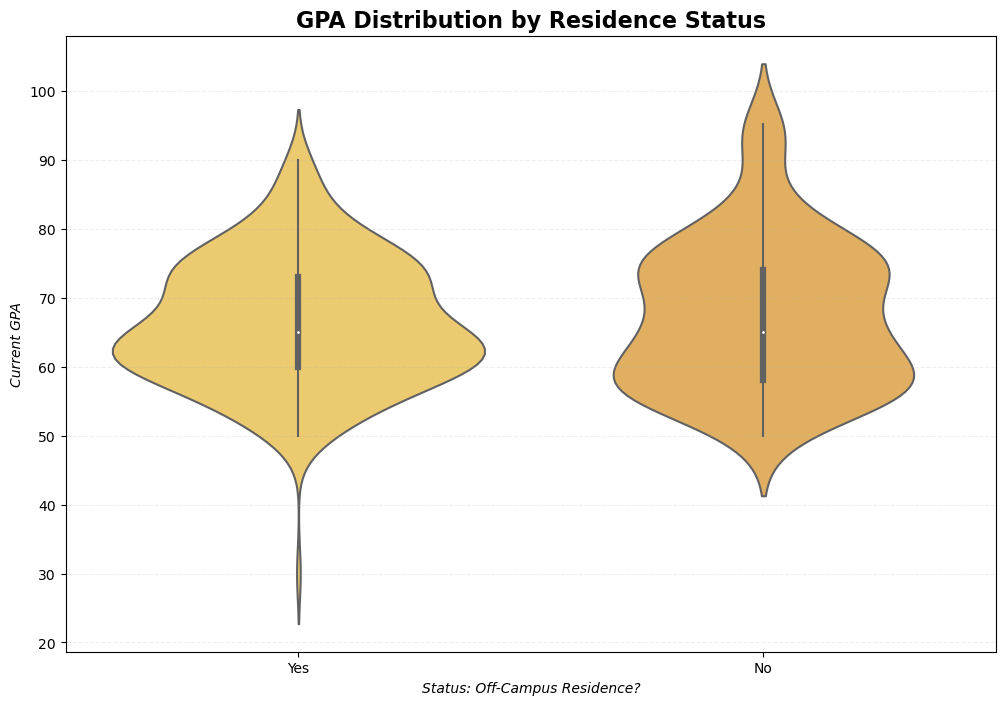

In [69]:
# Compare the GPA distribution for on campus vs off campus
plt.figure(figsize = (12,8))
sns.violinplot(
    data=df_drop_zeros,x="off_campus", y="current_gpa",bw=.4, palette = ["#ffd45b","#f6b44d"]
)
plt.xlabel("Status: Off-Campus Residence?", fontstyle = "italic")
plt.ylabel("Current GPA", fontstyle = "italic")
plt.title("GPA Distribution by Residence Status", fontweight = "bold", fontsize = 16)

plt.grid(axis='y', alpha = .2, linestyle = '--')

plt.show()


In [28]:
df_drop_zeros.groupby("off_campus").describe().current_gpa

,count,mean,std,min,25%,50%,75%,max
off_campus,,,,,,,,
No,37.0,67.383784,10.905898,50.0,58.0,65.0,74.0,95.2
Yes,261.0,66.367050,9.099099,30.0,60.0,65.0,73.0,90.0


In [31]:
# Conduct a T Test
# Null hypothesis: A student living on campus will have no improvement in GPA compared to a student living off campus
# Alternate hypothesis: A student living on campus will have as signficant improvement in GPA compared to a student living  off campus

off_campus_gpa = df_drop_zeros.loc[df_drop_zeros.off_campus == "Yes", "current_gpa"]
on_campus_gpa = df_drop_zeros.loc[df_drop_zeros.off_campus == "No", "current_gpa"]

st.ttest_ind(off_campus_gpa, on_campus_gpa, equal_var = False)

TtestResult(statistic=-0.541016955192321, pvalue=0.5912623851594576, df=43.397111892506636)

In [ ]:
# There is a significantly large pvalue and therefore the Null hypothesis cannot be rejected